In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
from tensorflow import keras

In [5]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
len(X_train)

60000

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

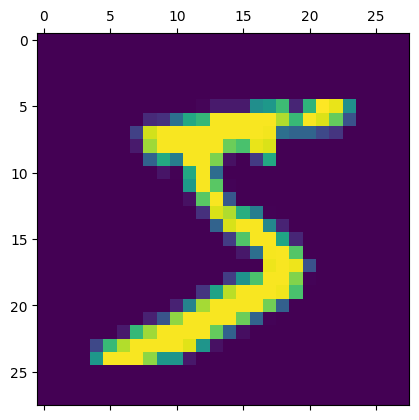

In [10]:
plt.matshow(X_train[0])

In [11]:
y_train[0]

5

In [12]:
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [13]:
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train_flattened.shape

(60000, 784)

In [24]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [29]:
X_train_flattened=X_train_flattened/255
X_test_flattened=X_test_flattened/255

model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2677 - accuracy: 0.8301
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8905 - accuracy: 0.8699
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6171 - accuracy: 0.8848
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4519 - accuracy: 0.8969
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3604 - accuracy: 0.9068
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3111 - accuracy: 0.9149
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2859 - accuracy: 0.9190
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9234
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2653 - accuracy: 0.9251
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.260

In [30]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2660 - accuracy: 0.9254


[0.26604506373405457, 0.9254000186920166]

In [32]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [34]:
y_predicted_label=[np.argmax(i) for i in y_predicted]

In [38]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)

In [39]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1113,    2,    2,    0,    1,    4,    2,   11,    0],
       [   7,   13,  911,   20,    6,    4,   13,   10,   44,    4],
       [   4,    1,   15,  922,    0,   20,    2,   12,   26,    8],
       [   2,    2,    6,    2,  901,    0,    8,    4,    9,   48],
       [  10,    3,    1,   28,    6,  782,   13,    5,   36,    8],
       [  13,    3,    8,    1,    7,   12,  909,    1,    4,    0],
       [   2,    8,   21,    9,    7,    0,    0,  940,    3,   38],
       [   9,   10,    5,   15,    9,   19,    9,   10,  879,    9],
       [  11,    7,    1,    8,   18,    5,    0,   18,    8,  933]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'predicted')

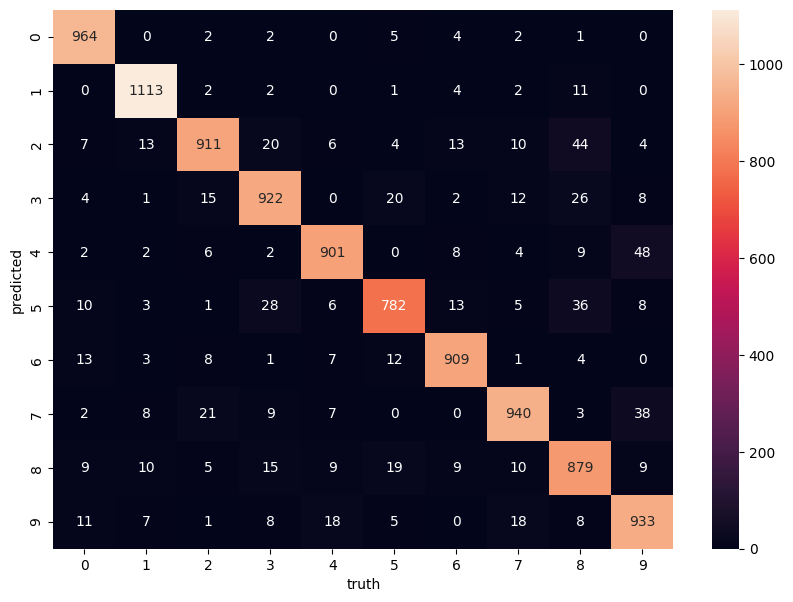

In [42]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('truth')
plt.ylabel('predicted')

In [45]:
model2=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [46]:
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [48]:
model2.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1241 - accuracy: 0.9636
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0851 - accuracy: 0.9741
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0637 - accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0504 - accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0414 - accuracy: 0.9871
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0334 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0262 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0233 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0192 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

In [49]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2660 - accuracy: 0.9254


[0.26604506373405457, 0.9254000186920166]

*we can use keras flatten layer to flatten the input*

In [58]:
model3.evaluate(X_test/255,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0871 - accuracy: 0.9759


[0.08707722276449203, 0.9758999943733215]